# Exploratory Data Analysis - Data Visualization and Summary Statistics

Welcome to the third notebook of the exploratory data analysis (EDA) series. This notebook is a continuation of the rideshare notebook you used last week.

For this notebook you will use the data on ridesharing in the year 2022 in the city of Chicago, which can be found [here](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p/data). You have already worked with this dataset in the previous week. This time you will continue working on the cleaned-up and reduced version of the dataset, which you prepared in the previous notebook.

### Learning Objectives:
In this notebook you will use the following concepts from the course in a practical setting:
 - Probability
 - Descriptive statistics (mean, median, standard deviation and quartiles)
 - Box plots
 - Joint distribution
 - Marginal distribution
 - Correlation


# 1. Import the Python Libraries

As usual, the first thing you need to do is import the libraries that you will use in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for displaying a map
import folium 
from folium.plugins import FastMarkerCluster

# 2. Load the Dataset

The next step is to open the dataset. This is the reduced and cleaned-up version that you used in the previous notebook.

In [2]:
# Open the dataset
# Note the parse_dates parameter, which automatically saves the given columns as dates.
df = pd.read_csv("data/rideshare_2022_cleaned.csv", parse_dates=['trip_start_timestamp', 'date'])

# Show the first few lines of the dataset
df.head()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date,weekday
0,2022-01-01,3905.0,44.5,55.0,0.0,11.25,66.25,0,1,41.972563,-87.678846,NaN,NaN,2022-01-01,Saturday
1,2022-01-01,2299.0,25.0,32.5,7.0,7.18,46.68,0,1,41.878866,-87.625192,NaN,NaN,2022-01-01,Saturday
2,2022-01-01,275.0,1.5,7.5,0.0,1.02,8.52,0,1,41.792357,-87.617931,41.812949,-87.617860,2022-01-01,Saturday
3,2022-01-01,243.0,1.0,5.0,0.0,2.36,7.36,0,1,41.936310,-87.651563,41.943155,-87.640698,2022-01-01,Saturday
4,2022-01-01,364.0,1.3,5.0,0.0,2.36,7.36,0,1,41.921855,-87.646211,41.936237,-87.656412,2022-01-01,Saturday


# 3. Investigate the Summary Statistics

To get a better grasp of the data it is very useful to learn a bit more about the values in each column. In the previous notebook you have already plotted some histograms of individual columns to see how the data is distributed. Now it's time to approach this more systematically. Let's look at the numeric values first. Pandas has a very useful function `.describe()`, which returns a new dataframe with summary statistics for each of the columns. Run the cell below to compute and display summary statistics for your dataset. The output is a new dataframe that contains the count, mean, standard deviation, minimum value, maximum value and 25%, 50% (median) and 75% quartiles for each of the columns. By now, you should be familiar with all of these statistics. If you need a refresher, check out the Week 2 Lesson 1 videos again. 

In [3]:
# Calculate and display the summary statistics
df.describe()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date
count,691098,691073.000000,691096.000000,689952.000000,689952.000000,689952.000000,689952.000000,691098.000000,691098.000000,635075.000000,635075.000000,632163.000000,632163.000000,691098
mean,2022-07-09 12:13:17.168419328,1089.008338,6.941224,18.577024,1.264072,4.694999,24.536095,0.022537,1.010250,41.889642,-87.671920,41.890190,-87.674246,2022-07-09 02:16:40.835192832
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.650222,-87.913625,41.650222,-87.913625,2022-01-01 00:00:00
25%,2022-04-11 11:45:00,543.000000,2.000000,10.000000,0.000000,2.490000,13.440000,0.000000,1.000000,41.871016,-87.689319,41.871016,-87.691430,2022-04-11 00:00:00
50%,2022-07-12 09:45:00,880.000000,4.100000,15.000000,0.000000,3.550000,19.020000,0.000000,1.000000,41.893216,-87.654093,41.893216,-87.654007,2022-07-12 00:00:00
75%,2022-10-08 19:30:00,1416.000000,9.200000,22.500000,1.000000,5.460000,29.490000,0.000000,1.000000,41.934762,-87.631407,41.935706,-87.631407,2022-10-08 00:00:00
max,2022-12-31 12:45:00,34892.000000,366.900000,637.500000,100.000000,253.010000,656.750000,1.000000,5.000000,42.021224,-87.530712,42.021224,-87.530712,2022-12-31 00:00:00
std,NaN,782.835520,7.773458,14.069854,2.923235,4.314872,17.627719,0.148421,0.113987,0.067517,0.070488,0.067239,0.075001,NaN


In the dataframe above, you can find a lot of useful information. Carefully inspect the contents of the table to understand the data better. The following questions may help you think about the insights you can get from the summary statistics presented in the table.
1. Check the minimum and maximum value for each column. What are their values and how far apart are they? For example: What is the shortest and longest trip that was taken and what is the difference between them?
2. What is mean value of each column? For example: What is the mean trip length? Is it closer to the minimum or maximum value?
3. What is the standard deviation of each column? For example: how much do the trip lengths vary?
4. Compare the quartiles and the mean. Is the mean above or below the median? How could you explain this (think of the shape of the histograms you saw in the previous notebook and look for long or heavy tails).

Note that the first three questions all relate to the same column `trip_miles`. You can ask the same question about any column, for example: What is the mean/median/highest/lowest tip?

## 3.1 Visualize the Summary Statistics Using Boxplots

A great way to understand your data is to visualize it! A commonly used tool to display summary statistics is a boxplot. Fortunately, it is already integrated to `Pandas`, and you can simply draw it by using `DataFrame.boxplot()`. Remember that the box-plot involves infromation about all the quartiles and the maximum and minumum values of the variable, and it looks something like this

![](./images/box-plot-screenshot.png)

As with other plots, if you do not specify which variable, or column, you want to plot, it will plot all of them. Because the columns have very different values, it is better to plot one by one, so you can more easily see the information being communicated.

<Axes: >

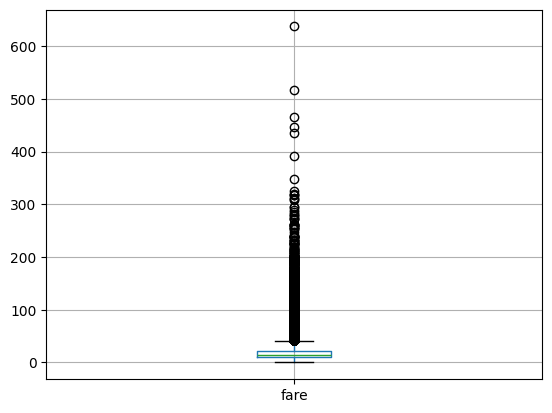

In [4]:
# Select the column which you want to plot. Change this for a different column name,
# if you are interested in plotting other columns
column_to_plot = 'fare'

# Display the boxplot
plt.figure()
df.boxplot(column_to_plot)

The blue box shows the interquartile range (IQR), and the horizontal blue lines in the box show the Q1, Q2 (median), and Q3 quartiles. You can see these three numbers in the dataframe above (25%, 50% and 75%). Check whether they align with the plot. The horizontal black lines outside the box show +/- 1.5 times IQR, which is the default range used to identify outliers. The individual datapoints plotted outside the lines are the outliers.

In the case of `fare` you can see a lot of outlier points, can you figure out why? Remember the distribution of this variable

array([[<Axes: title={'center': 'fare'}>]], dtype=object)

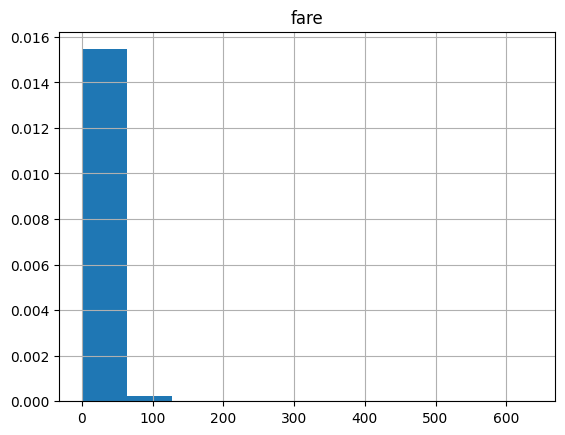

In [5]:
df.hist(column_to_plot, density=True)

As you can see, this distribution is really heavy for smaller values, and has a really long tail, which is the values you are seeing as outliers.

Go ahead and change the `column_to_plot` variable and plot the boxplots for other columns. Do they all have outliers only on one side? can you infer why?

## 3.2 Visualize the Data on different weekdays

If you want to split the data into subsets (for example for given days of the week) and plot a boxplot for each, you can easily do that using the parameter `by`. You just need to set it to the column name you want to use to split the data. Suppose you want to analize the `tip` variable by day of the week. Intuitively, what you are doing is creting classes according to the different days in `weekday`, and then analyzing the data for each of this classes. This way what you are actually doing is exploring the conditional distributions of a variable. In this case, you are looking at the tip given that it's a Monday, the tip given that it's a Tuesday, and so on.

(-2.0, 52.0)

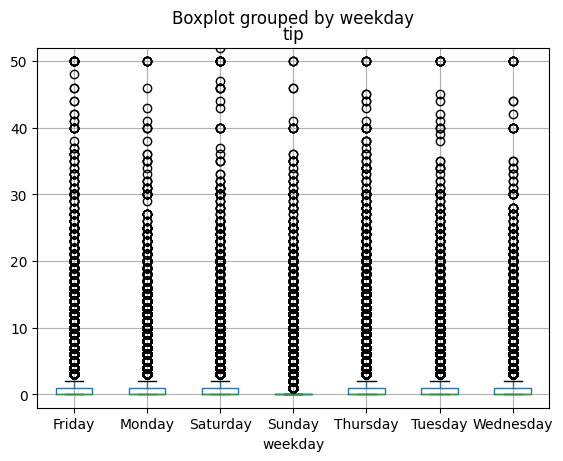

In [6]:
df.boxplot(column='tip', by='weekday')

# Limit the plot in y direction. Comment this line of code to see full data
plt.ylim(-2, 52)

If you look closely, there are a couple of things that look a bit off in these boxplots. For example, what is happening with the Sunday data when you are looking at tips? It seems that there is no box in the boxplot. Also if you look more closely, the boxes that you see dont have a horizontal line in the middle. Why do you think this is happening? You can find a hint by thinking about the histogram of the tips that you saw in the previous notebook. Did the distribution have any interesting properties? If you don't remember what it looked like, feel free to create a new cell and draw the histogram. 

Another, more obvious, hint is in the summary statistics. Run the cell below to display them again, but this time you will do it just for the `tip` column, grouped by `weekday`.

In [7]:
# Group the data by the day of the week, select the tip column and calculate the descriptive statistics.
df.groupby('weekday')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
weekday,,,,,,,,
Friday,115730.0,1.284628,2.999008,0.0,0.0,0.0,1.0,70.0
Monday,78922.0,1.309952,3.009671,0.0,0.0,0.0,1.0,57.0
Saturday,132688.0,1.149222,2.656089,0.0,0.0,0.0,1.0,83.0
Sunday,96823.0,1.216395,2.880735,0.0,0.0,0.0,0.0,75.0
Thursday,95561.0,1.355553,3.124336,0.0,0.0,0.0,1.0,100.0
Tuesday,82479.0,1.291480,2.945485,0.0,0.0,0.0,1.0,61.0
Wednesday,87749.0,1.296585,2.921619,0.0,0.0,0.0,1.0,70.0


You can see that there are a lot of zeroes in this dataframe. Where do they all come from? It turns out that on Sunday more than 75% of the people did not tip. This makes the first three quartiles all show a zero, which is why you couldn't see a box on the boxplot. Remember that the size of the box is the distance between the values in the columns `25%` and `75%`. If these are both zero, the size of the box must also be zero.

On the other days, however, less than 75% of the people did not tip, thus you have a nonzero value of the tip in the third quartile (in the column with name 75%). What does it mean for the plots? You have guessed it: the boxes appear. However, you still can't see the middle line and that is because the median (50% of the data) is the same as the first quaritle (25%), and thus the two lines overlap at zero.

An interesting insight: on Sunday, all of the tips are outliers.

Now, let's repeat the process but leave out non-tippers. This should give you a better understanding of the distribution of the actual tips.

<Axes: title={'center': 'tip'}, xlabel='weekday'>

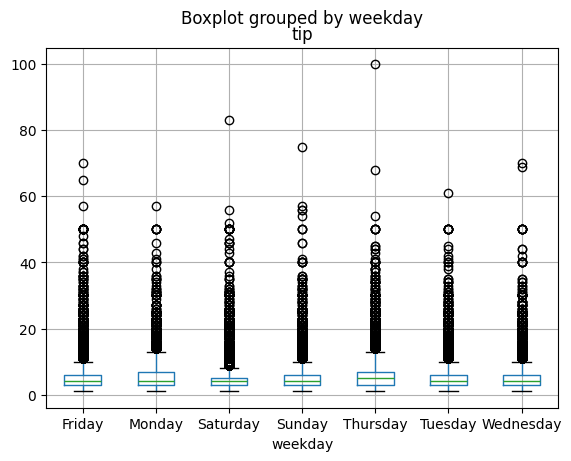

In [8]:
df_tippers = df[df['tip'] > 0]
df_tippers.boxplot(column='tip', by='weekday')

This plot gives you a better insight into the distribution of the tips that actually happened, however it misses an important piece of information: how many people do actually tip? You have calculated this already in the previous notebook.

Imagine you are a driver. Is there any day of the week that you would like to drive more, as the tips are higher? 
Spliting by day of the week doesn't seem to have much of an impact to make this decision. Maybe you can have a look at the tips given different hours of day. Perhaps there is a higher chance of getitng tipped at a certain hour. Lets see if that's the case by running the cell below. For this, you will need to extract the hour of the trip for the `trip_start_timestamp` column, and save it on a new column in the dataframe.

<Axes: title={'center': 'Percentage of Tippers'}, xlabel='hour'>

<Figure size 640x480 with 0 Axes>

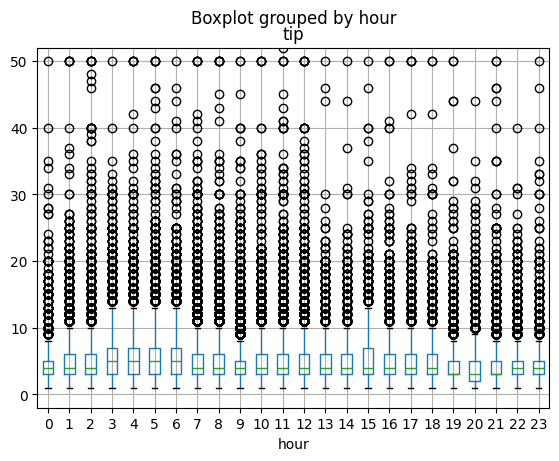

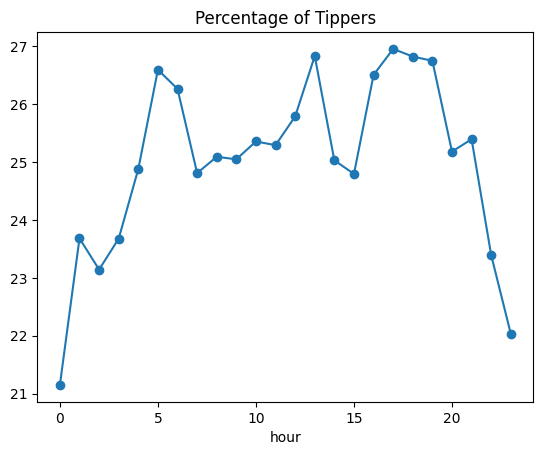

In [9]:
# Add a column for the hour of day to the dataframe
df["hour"] = df["trip_start_timestamp"].apply(lambda x: x.hour)
# Select only the tippers
df_tippers = df[df['tip'] > 0]

# Plot the boxplot of tips for each hour
plt.figure()
df_tippers.boxplot(column='tip', by='hour')
plt.ylim(-2, 52)

# Calculate the percentage of tippers
percentage_of_tippers_hourly = df_tippers.groupby(["hour"])["tip"].count() / df.groupby(["hour"])["tip"].count() * 100

# Plot the percentage of tippers
plt.figure()
percentage_of_tippers_hourly.plot(marker="o", title="Percentage of Tippers")

It seems like the tips are slightly higher in the morning hours. But why would the tips be higher in the early morning? Maybe this has to do with the hour of day, perhaps people feel more empathy in the morning. Before you jump to this conclusion, however, let's see if there's any other explanations worth considering.

Let's see if you can get any any extra information by looking at the the lenght of the trip. Plot the length of the trip next to see how it changes through the day:

(-10.0, 210.0)

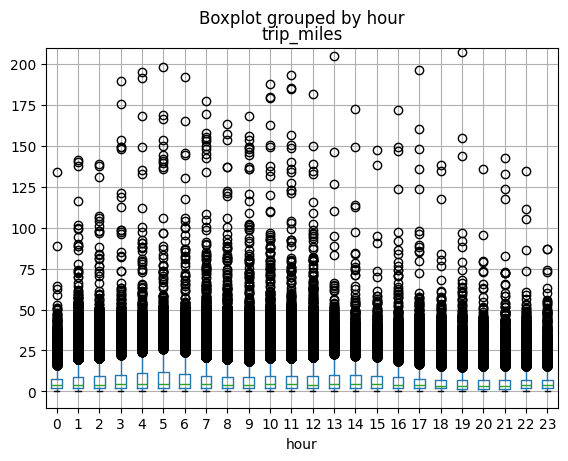

In [10]:
df.boxplot(column='trip_miles', by='hour')
plt.ylim(-10, 210)

As you can see the trips are longer in the early morning hours. Now this is getting interesting. Maybe this is the reason for the higher average tips? Run the next cell to plot a scatter plot of `trip_miles` vs `tip`. Remember that you are only looking at the tippers (no tippers would just contribute to many additional points at tip=0).

<Axes: xlabel='trip_miles', ylabel='tip'>

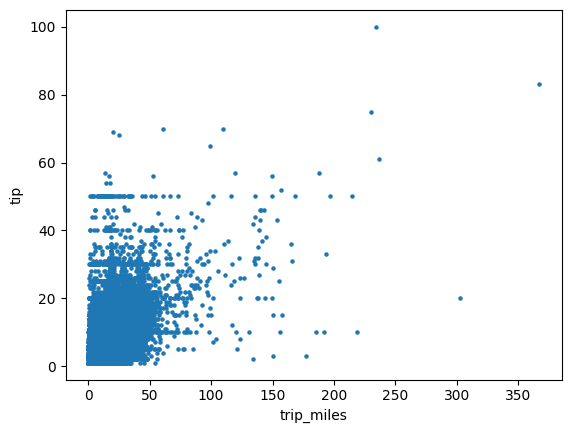

In [11]:
df_tippers.plot(kind='scatter', x='trip_miles', y='tip', marker=".")

Can you say something about the correlation between these two variables?  Remember that the correation was a scaled version of the Covariance, that was scaled to have range between -1 and 1
<img src="./images/corr_coef_screenshot.png" width=400)>

The plot suggests that the riders pay higher tips for longer rides, which would imply a positive correlation. However the correlation is not that obvious, so the correlation will be positive, but not close 1. This correlation makes sense, as longer rides also cost more and thus the tips are likely to be higher. 

You can actually measure the correlation between the two variables using Pandas. Let's do it in the cell below!

In [12]:
(df_tippers.tip).corr(df_tippers.trip_miles)

0.6368983311939711

You got a correlation of 0.637. Remember that 0 correlation means no correlation at all, while correlation 1 means a perfect linear relationship, with positive slope. In this case, as predicted you get a value somewhere in between, being slightly above 0.5. You could say this is a modeate correlation between variables. 

Now try changing the variables in the plot above to see other columns. For example, you can plot `tip` against `fare`. How does it compare with the `tip` against `trip_miles` plot? Try also checking the correlation and making a comparison. 

# 4. Check the Locations of Rides

Another thing you might want to know is where the rides usually start. The dataset contains the columns "Pickup Centroid Latitude", "Pickup Centroid Longitude", "Dropoff Centroid Latitude", and "Dropoff Centroid Longitude", which tell you the locations of the pickup and dropoff respectively.

Run the cell below to plot the geographical distribution of the pickup locations.

Text(0, 0.5, 'Latitude (degrees)')

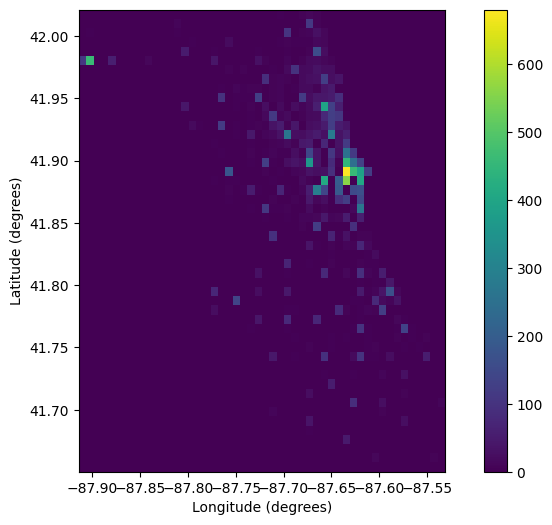

In [13]:
# Select the columns you want to plot
latitude = df.dropna()["pickup_centroid_latitude"].to_numpy()
longitude = df.dropna()["pickup_centroid_longitude"].to_numpy()
# Plot the 2D histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
hist = ax.hist2d(longitude, latitude, bins=50, density=True)
ax.set_aspect(1.3, "box")
fig.colorbar(hist[3])
ax.set_xlabel("Longitude (degrees)")
ax.set_ylabel("Latitude (degrees)")

What you have just plotted is a joint distribution! Joint distributions are distributions where a variable (in your case `tip`) is distributed across multiple variables (in your case latitude and longitude).

Looking at the distribution, it seems you have many rides in the middle right of the plot, which is likely to be downtown Chicago. But then there are also quite a few rides in the top left corner, very far away from everything else. What could there be at that location? 

To answer this question, you can actually produce an interactive map. Run the following code to do so, plotting the same points on an actual map of Chicago. In reality this cell is only going to plot a limited number of your data points, even from this downsampled data set, to ensure the map renders quickly enough. Check the locations on the map to see where the majority of the points are and what the location in the upper left could be.

Note generating this map is a more resource intensive operation and can sometimes fail. If the map doesn't render after a short wait, you can try re-running the cell.

In [15]:
# Define the function for plotting an interactive map
def interactive_map(df, n_samples=4000):
    
    points = df[["pickup_centroid_longitude", "pickup_centroid_latitude"]].dropna()[0:n_samples]
    
    latitude = points.iloc[0]["pickup_centroid_latitude"]
    longitude = points.iloc[0]["pickup_centroid_longitude"]
    
    map3 = folium.Map(location=[latitude, longitude], zoom_start=9)

    marker_cluster = FastMarkerCluster([]).add_to(map3)
    
    for index, row in points.iterrows():
        latitude = row["pickup_centroid_latitude"]
        longitude = row["pickup_centroid_longitude"]
        folium.Marker((latitude, longitude), icon=folium.Icon(color="green")).add_to(marker_cluster)

    return map3

# Run the function
# If the map doesn’t render, first try re-running this cell. If that doesn’t work, 
# you can restart the kernel (from the Kernel menu above) and try running the notebook again
interactive_map(df)

If you inspect the map carefully, you probably noticed that the rides from the top left corner come from the Chicago O'Hare International Airport. Run the code below to isolate these rides by their latitude and longitude and inspect them.

<Axes: title={'center': 'Percentage of Tippers on Rides From the Airport'}, xlabel='hour'>

<Figure size 640x480 with 0 Axes>

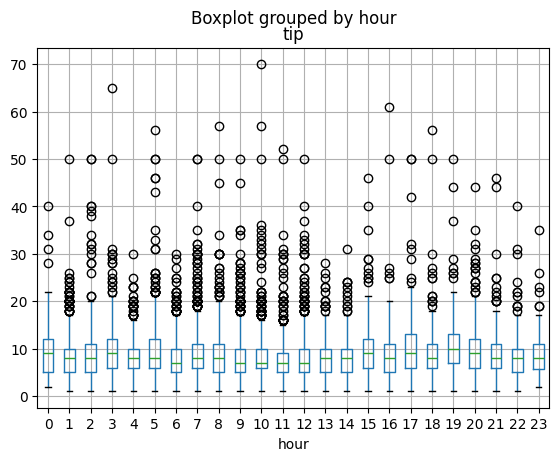

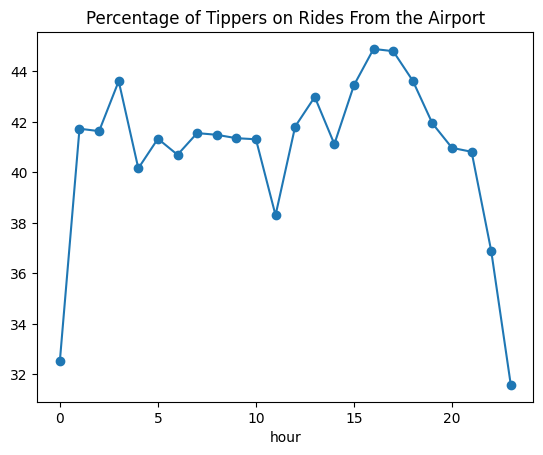

In [16]:
# Select all of the rides starting at the airport
airport_rides = df[
    (df["pickup_centroid_longitude"] < -87.9) &
    (df["pickup_centroid_latitude"] > 41.97) &
    (df["pickup_centroid_latitude"] < 41.99)
]

airport_df_tippers = airport_rides[airport_rides['tip'] > 0]

# Plot the boxplot of tips for each hour
plt.figure()
airport_df_tippers.boxplot(column='tip', by='hour')

# Calculate the percentage of tippers
airport_tippers_hourly = airport_df_tippers.groupby(["hour"])["tip"].count() / airport_rides.groupby(["hour"])["tip"].count() * 100

# Plot the percentage of tippers
plt.figure()
airport_tippers_hourly.plot(marker="o", title="Percentage of Tippers on Rides From the Airport")

As you can see the percentage of the people who tip is much higher for the rides that start at the airport. Looks like this is a good place to be as a driver!

**Congratulations on finishing this lab.** You have seen the implementation of quite a few concepts covered in this course: probabilities, descriptive statistics, such as mean, median, standard deviation and quartiles, you plotted box plots and a 2D histogram to represent a joint distribution and you looked into marginal distributions. On top of that you have practiced Pandas and plotting. If you liked this exercise, look out for another similar notebook next week!